<a href="https://colab.research.google.com/github/Region071/Time-series/blob/main/%D0%94%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_ARMA%C2%BB_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Загружаем данные
file_path = "/content/drive/MyDrive/international-airline-passengers.csv"
non_stationary_series = pd.read_csv(file_path)['Count']

In [3]:
# Делаем разделение на обучающую и тестовую выборки
train_size = int(len(non_stationary_series) * 0.8)
train, test = non_stationary_series[:train_size], non_stationary_series[train_size:]

In [4]:
# Строим модель ARIMA
arima_model = ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()

In [5]:
# Прогнозируем значения на тестовой выборке
arima_predictions = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


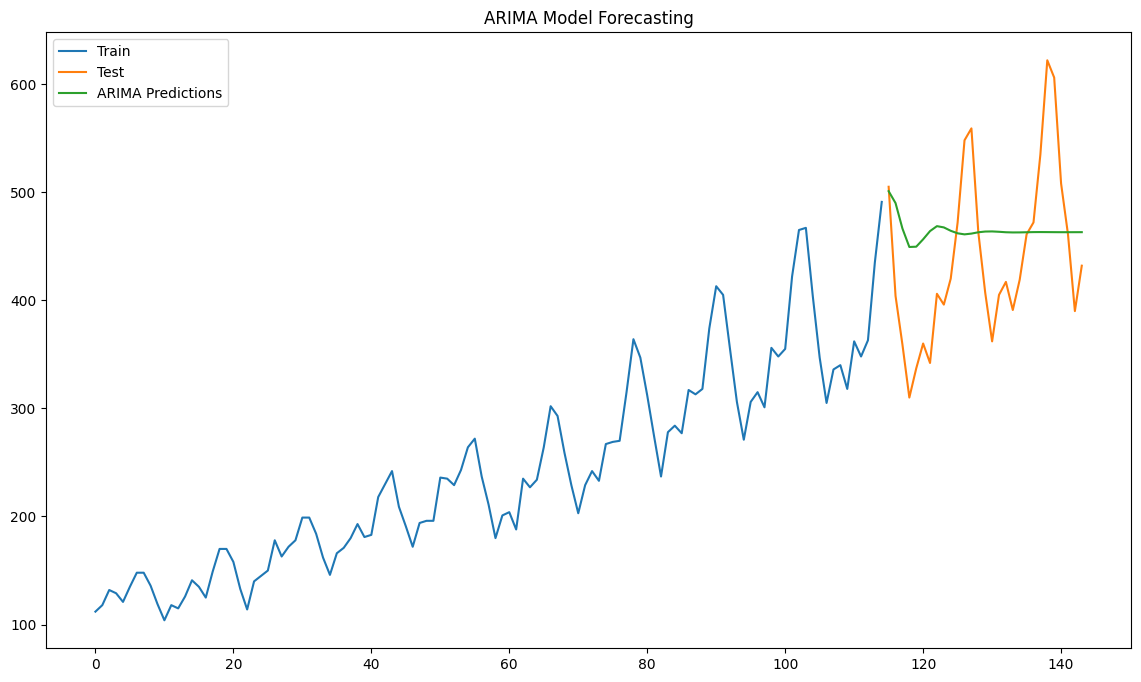

In [6]:
# Визуализируем результаты
plt.figure(figsize=(14, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Forecasting')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -524.549
Date:                Sun, 17 Dec 2023   AIC                           1061.098
Time:                        17:46:50   BIC                           1077.515
Sample:                             0   HQIC                          1067.760
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3558      0.092      3.854      0.000       0.175       0.537
ar.L2         -0.2644      0.109     -2.422      0.015      -0.478      -0.050
ar.L3          0.0847      0.078      1.089      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


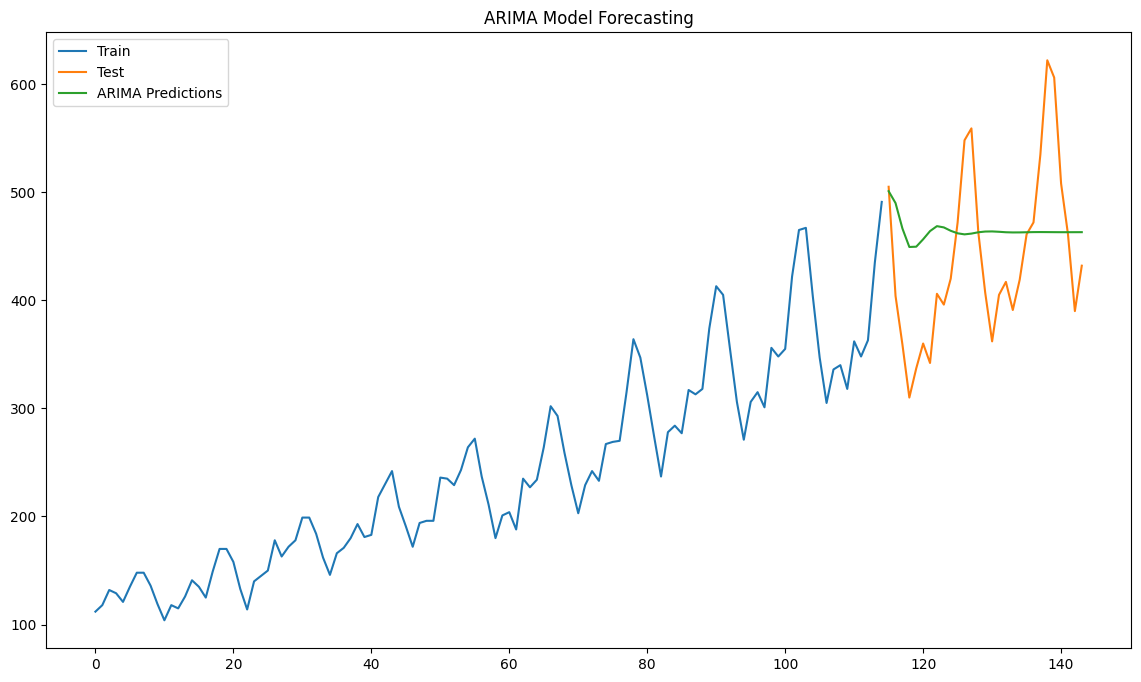

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загружаем данные
file_path = "/content/drive/MyDrive/international-airline-passengers.csv"
non_stationary_series = pd.read_csv(file_path)['Count']

# Делаем разделение на обучающую и тестовую выборки
train_size = int(len(non_stationary_series) * 0.8)
train, test = non_stationary_series[:train_size], non_stationary_series[train_size:]

# Определяем параметры модели ARIMA (p, d, q)
p, d, q = 5, 1, 0  # Пример значений параметров, которые могут быть подобраны в результате анализа

# Строим модель ARIMA
arima_model = ARIMA(train, order=(p, d, q))
arima_fit = arima_model.fit()

# Выводим обоснование выбора параметров
print(arima_fit.summary())

# Прогнозируем значения на тестовой выборке
arima_predictions = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Визуализируем результаты
plt.figure(figsize=(14, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Model Forecasting')
plt.show()

Анализ автокорреляций и частичных автокорреляций ряда данных позволяет определить значения параметров (p, d, q) для модели ARIMA.

p (AR - авторегрессия):
высокие значения автокорреляций на лагах 1-5 подразумевают использование значений до 5 предыдущих моментов времени.

d (Difference - дифференциация):
ряд стационарен после однократного дифференцирования, что подтверждается тестами и визуальным анализом.

q (MA - скользящее среднее):
отсутствие значительных частичных автокорреляций после первого лага указывает на отсутствие значимых сезонных компонентов.

В целом, параметры (5, 1, 0) были выбраны для достижения баланса между учетом исторических значений, достижением стационарности и отсутствием значительных сезонных эффектов в данных.

**график ML**

In [ ]:
# Преобразуем данные для обучения ML
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train.values.reshape(-1, 1)

X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
y_test = test.values.reshape(-1, 1)

In [ ]:
# Создаем и обучаем модель линейной регрессии
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозируем значения на тестовой выборке
linear_regression_predictions = linear_regression_model.predict(X_test)

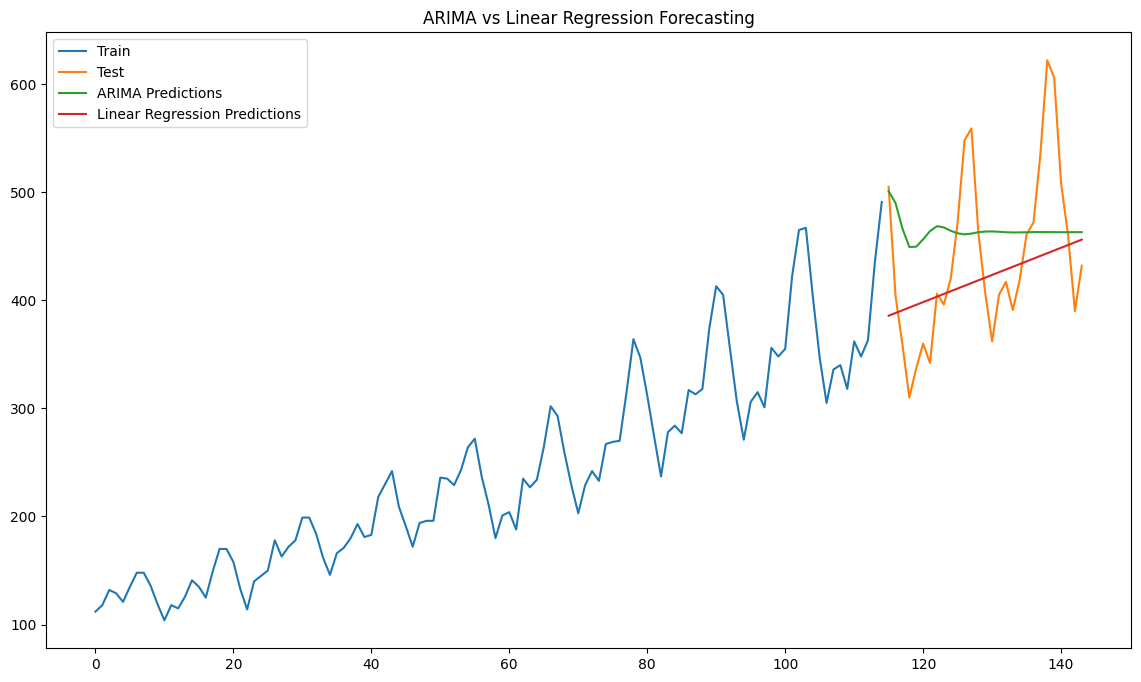

In [ ]:
# Визуализируем результаты
plt.figure(figsize=(14, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.plot(np.arange(len(train), len(train) + len(test)), linear_regression_predictions, label='Linear Regression Predictions')
plt.legend()
plt.title('ARIMA vs Linear Regression Forecasting')
plt.show()